## Data Challenge 2

### Remarks / Insights

TBC



In [31]:
import warnings
warnings.filterwarnings('ignore')

# Add this to python2 code to make life easier
from __future__ import absolute_import, division, print_function

import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import mpld3
import numpy as np
import matplotlib.dates as mdates
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

from IPython.display import display, display_pretty, Javascript, HTML
# from pandas_highcharts.core import serialize
from pandas_highcharts.display import display_charts

# %qtconsole


# !python -m pip install ipython-sql
%load_ext sql
%config SqlMagic.autopandas=True
%matplotlib inline

sns.set_context('talk')
sns.set_style('darkgrid') 
plt.rcParams['figure.figsize'] = 12, 6  # plotsize 

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [5]:
# Connect to SQL databse
%sql postgresql://JFBG@localhost/panama

u'Connected: JFBG@panama'

### Look at total number of involved parties

1 rows affected.
1 rows affected.
1 rows affected.


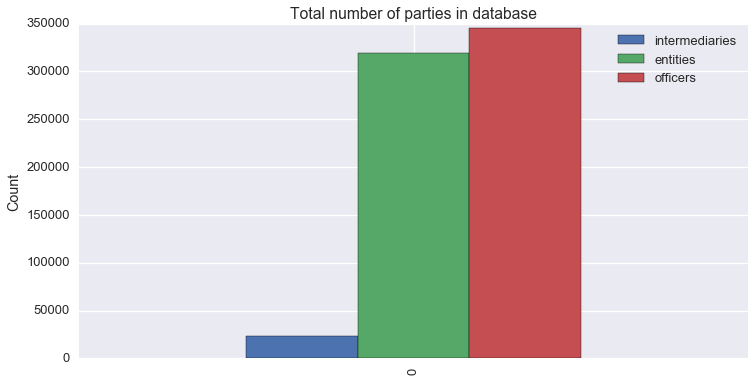

In [24]:
df_count = pd.DataFrame()
val = %sql select count(*) from intermediaries;
df_count['intermediaries'] = val
val = %sql select count(*) from entities;
df_count['entities'] = val
val = %sql select count(*) from officers;
df_count['officers'] = val
plt.figure()
df_count.plot.bar()
plt.title('Total number of parties in database')
plt.ylabel('Count')

### Look at distribution per country (top 100)

In [44]:
maxnum = 10
df_countries_E = %sql select countries, count(countries) count_c from entities group by countries order by count_c desc limit :maxnum;
# df_countries_E = %sql select country_codes, count(country_codes) count_c from entities group by country_codes order by count_c desc;
display_charts(df_countries_E, kind='pie', y=['countries'], title='Number of Entities per Country')

10 rows affected.


In [48]:
# df_countries_E
df_countries_E.head()

,countries,count_c
0,Hong Kong,38844
1,Switzerland,37917
2,British Virgin Islands,37277
3,Panama,15824
4,Jersey,14333
